In [2]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker 
import matplotlib.pyplot as plt
from pathlib import Path


In [3]:
api_key = contents = Path("YT_API_KEY.txt").read_text()
channel_handles = ['@alextheanalyst', # Alex The Analyst
                   '@techTFQ', # techTFQ
                   '@LukeBarousse', # Luke Barousse
                   '@KenJee_ds', # Ken Jee
                   '@TinaHuang1' #Tina Huang
                ]

api_service_name = 'youtube'
api_version = 'v3'

# Initialize YouTube Data API client using google api library
youtube = build(api_service_name, api_version, developerKey=api_key)

# Analyze YouTube Channels About Data Science
## Function to request channel information

In [ ]:
# request channel information using youtube data api
def request_channel_info(youtube, channel_handles):
    
    all_data = []
    responses = []
    
    for handle in channel_handles:
        request = youtube.channels().list(
            part='snippet,statistics,contentDetails',
            forHandle=handle
            )
        
        response = request.execute()
        responses.append(response)
        
        
    for response in responses:  
        response_data = response['items'][0]
        data = {'Channel_name': response_data['snippet']['title'],
               'Subscribers': response_data['statistics']['subscriberCount'],
               'Views': response_data['statistics']['viewCount'],
               'Total_videos': response_data['statistics']['videoCount'],
               'Playlist_ID': response_data['contentDetails']['relatedPlaylists']['uploads']
               }
       
        all_data.append(data)        
        
        
    #return response
    return all_data

In [5]:
channel_statistics = request_channel_info(youtube, channel_handles)

In [6]:
channel_statistics

[{'Channel_name': 'Alex The Analyst',
  'Subscribers': '1000000',
  'Views': '47154987',
  'Total_videos': '351',
  'Playlist_ID': 'UU7cs8q-gJRlGwj4A8OmCmXg'},
 {'Channel_name': 'techTFQ',
  'Subscribers': '360000',
  'Views': '20562915',
  'Total_videos': '139',
  'Playlist_ID': 'UUnz-ZXXER4jOvuED5trXfEA'},
 {'Channel_name': 'Luke Barousse',
  'Subscribers': '508000',
  'Views': '25355960',
  'Total_videos': '163',
  'Playlist_ID': 'UULLw7jmFsvfIVaUFsLs8mlQ'},
 {'Channel_name': 'Ken Jee',
  'Subscribers': '267000',
  'Views': '9350945',
  'Total_videos': '288',
  'Playlist_ID': 'UUiT9RITQ9PW6BhXK0y2jaeg'},
 {'Channel_name': 'Tina Huang',
  'Subscribers': '799000',
  'Views': '36255962',
  'Total_videos': '244',
  'Playlist_ID': 'UU2UXDak6o7rBm23k3Vv5dww'}]

In [7]:
# chonvert channel data to panda DataFrame
channel_data = pd.DataFrame(channel_statistics)

In [8]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_ID
0,Alex The Analyst,1000000,47154987,351,UU7cs8q-gJRlGwj4A8OmCmXg
1,techTFQ,360000,20562915,139,UUnz-ZXXER4jOvuED5trXfEA
2,Luke Barousse,508000,25355960,163,UULLw7jmFsvfIVaUFsLs8mlQ
3,Ken Jee,267000,9350945,288,UUiT9RITQ9PW6BhXK0y2jaeg
4,Tina Huang,799000,36255962,244,UU2UXDak6o7rBm23k3Vv5dww


In [9]:
channel_data[['Subscribers','Views','Total_videos']] = channel_data[['Subscribers','Views','Total_videos']].apply(pd.to_numeric)

In [10]:
channel_data = channel_data.sort_values(by='Subscribers', ascending=True)

## Plot the statistic results

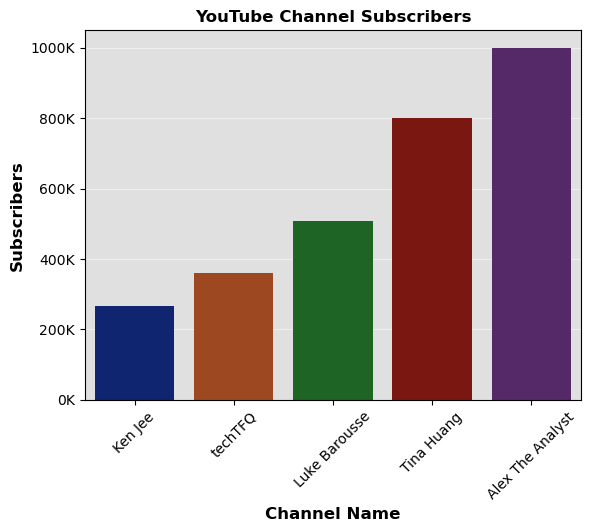

In [11]:
ax=plt.subplot()
ax.set_facecolor('#e0e0e0')
ax.grid(True,axis='y', linestyle='-', color='white', alpha=0.5)
sns.barplot(x='Channel_name', y='Subscribers', hue='Channel_name', data=channel_data, 
            palette='dark', legend = False, ax=ax, zorder = 2)
ax.set_xlabel('Channel Name', fontsize=12, fontweight='bold')
ax.set_ylabel('Subscribers', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', labelsize=10, rotation=45)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('YouTube Channel Subscribers', fontsize=12, fontweight='bold');
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e3)}K'))

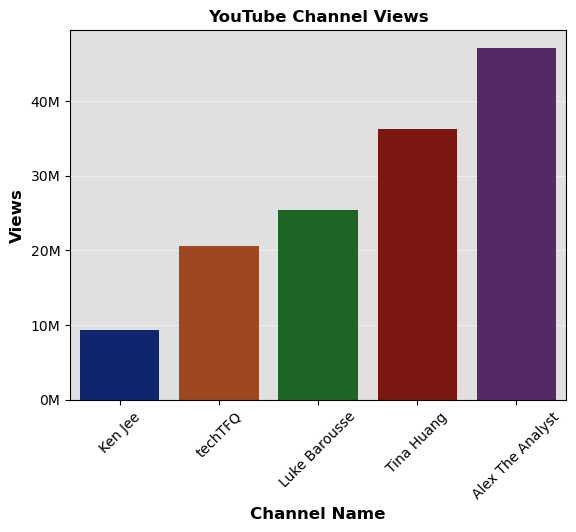

In [12]:
ax=plt.subplot()
ax.set_facecolor('#e0e0e0')
ax.grid(True, axis='y', linestyle='-', color='white', alpha=0.5)
sns.barplot(x='Channel_name', y='Views', hue='Channel_name', data=channel_data, 
            palette='dark', legend=False, ax=ax, zorder=2)
ax.set_xlabel('Channel Name',fontsize=12, fontweight='bold')
ax.set_ylabel('Views',fontsize=12, fontweight='bold')
ax.tick_params(axis='x', labelsize=10,rotation=45)
ax.tick_params(axis='y',labelsize=10)
ax.set_title('YouTube Channel Views',fontsize=12, fontweight='bold');
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))

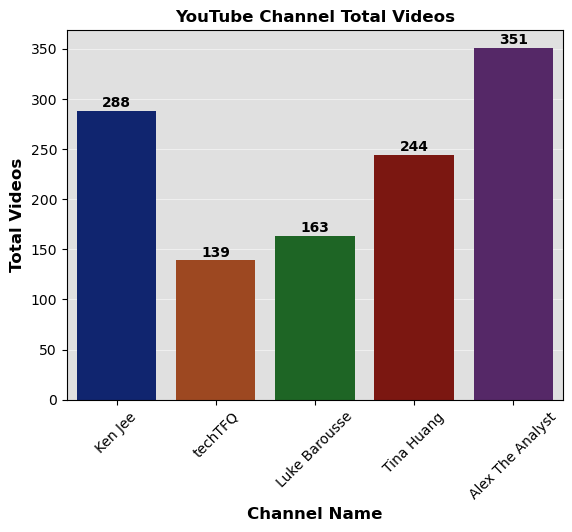

In [13]:
ax = plt.subplot()
ax.set_facecolor('#e0e0e0')
ax.grid(True, axis='y', linestyle='-', color='white', alpha=0.5)
sns.barplot(x='Channel_name', y='Total_videos', hue='Channel_name', data=channel_data, 
            palette='dark', legend=False, ax=ax, zorder=2)
ax.set_xlabel('Channel Name',fontsize=12, fontweight='bold')
ax.set_ylabel('Total Videos',fontsize=12, fontweight='bold')
ax.tick_params(axis='x', labelsize=10,rotation=45)
ax.tick_params(axis='y',labelsize=10)
ax.set_title('YouTube Channel Total Videos',fontsize=12, fontweight='bold');


for i, value in enumerate(channel_data['Total_videos']):
    plt.text(i, value+1, str(value), ha='center', va='bottom',fontsize=10, fontweight='bold')

# Analyze A Specific Channel

## Funtion to get video IDs

In [ ]:
def get_playlist_videos(youtube, Playlist_ID): 
    
    video_ids = []
    next_page_token = None   
    
    while True: 
        request = youtube.playlistItems().list(
            part='snippet,contentDetails',
            maxResults=50,
            pageToken=next_page_token,
            playlistId=Playlist_ID)
        response = request.execute()
        #return response
    
        for item in response['items']:
           video_id = item['contentDetails']['videoId']
           #title = item['snippet']['title']       
           video_ids.append(video_id)
        
        next_page_token=response.get('nextPageToken')
        #print(next_page_token)
        if not next_page_token:
            break    
           
    return video_ids
   
   

In [35]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_ID
3,Ken Jee,267000,9350945,288,UUiT9RITQ9PW6BhXK0y2jaeg
1,techTFQ,360000,20562915,139,UUnz-ZXXER4jOvuED5trXfEA
2,Luke Barousse,508000,25355960,163,UULLw7jmFsvfIVaUFsLs8mlQ
4,Tina Huang,799000,36255962,244,UU2UXDak6o7rBm23k3Vv5dww
0,Alex The Analyst,1000000,47154987,351,UU7cs8q-gJRlGwj4A8OmCmXg


In [46]:
playlist_ID = channel_data.loc[channel_data['Channel_name']=='Alex The Analyst','Playlist_ID'].iloc[0]

In [47]:
video_ids = get_playlist_videos(youtube, playlist_ID)

In [48]:
video_ids

['1ql4kNv0_qY',
 'r5512UY3MTc',
 'XuOcmjIbFGg',
 'Ka2mDrKEAhg',
 'k8nBWL6K884',
 'WpX2F2BS3Qc',
 'cd_jj0IRmaA',
 'OcG0B4ny1cE',
 'hXpt8zj_ajc',
 'ItZlTixh6Bs',
 'PEWMgtu-1e4',
 'hCmEfxy-BXg',
 'TtCBz1lutsY',
 'Ihmq-qeA5Pc',
 'wQQR60KtnFY',
 'oHte3qFa-oY',
 'P7p2OZj9ewU',
 'I0vQ_VLZTWg',
 'tnz72ywhCoo',
 'j8FSP8XuFyk',
 'zXnQNytHCPM',
 'osA1QpBcxRs',
 'Mdq1WWSdUtw',
 'CZt2BUpgjgw',
 't1fQBD4B7xk',
 'OT1RErkfLNQ',
 'rxyLC247h6E',
 'AycpRKyRagE',
 'K2GfrERtliU',
 'xmVyaT-RuVo',
 'amb9bciHGSI',
 'hgaVi4sOHkM',
 'YSjbGET6R1A',
 'vDVcXXfc9e8',
 'Vg6ys_JvXzg',
 'sge9qTf8GdY',
 '9ur0OpMADuM',
 'UTMuL_86gSQ',
 'sEImMaovc1Q',
 'ZYps6TmBkWk',
 'zv1nfZTYpio',
 'rn0dSsYXhIE',
 'siHou7lObbo',
 'wJiJXD7MVoY',
 'BzwAZ1k3WEY',
 '5q2u8__sVhs',
 'UJbNEH0_nGY',
 'oz2K4HUNMW4',
 'Y-4ri9QjsTI',
 'F5v2dRYU5IA',
 '_R6K1aNtKpE',
 '5tKmTdvEAVk',
 'QYd-RtK58VQ',
 'c5ko0sedE7k',
 '4UltKCnnnTA',
 'BV5ckMNNvi4',
 'QMUZ5HfWMRc',
 '7b8ViCqD9JM',
 '7vnxpcqmqNQ',
 'uEk07jXdKOo',
 'UC7uvOqcUTs',
 '1KEbiqRWOkA',
 'UOBTLz

## Function to get Video details

In [71]:
def get_video_block_details(youtube, video_id):
    """
    get video details with maximal 50 video IDs
    """
    
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        id=','.join(video_id)
    )
    response = request.execute()
    
    return response


In [72]:
def get_all_video_details(youtube,video_id):
    
    video_details = []
    video_len=len(video_id)
    
    for i in range(0,video_len,50):
        video_id_block=video_id[i:i+50]        
        video_details.append(get_video_block_details(youtube, video_id_block))   

    return video_details   
        

In [ ]:


get_video_block_details(youtube,video_ids)

{'kind': 'youtube#videoListResponse',
 'etag': 'bksRVm47n3X18TmldS6quA3CWAY',
 'items': [{'kind': 'youtube#video',
   'etag': '91_Q3weLs4BfQq03Df1MTNDHofY',
   'id': '1ql4kNv0_qY',
   'snippet': {'publishedAt': '2025-03-11T12:00:02Z',
    'channelId': 'UC7cs8q-gJRlGwj4A8OmCmXg',
    'title': 'Where to find the Best Healthcare Data',
    'description': "In this video I'm going to show you where you can find Healthcare data for just about anything you could imagine!\n\nWebsites: \nData.gov - https://catalog.data.gov/dataset?q=healthcare\nhealthdata.gov - https://healthdata.gov/browse?sortBy=newest&pageSize=20&limitTo=datasets\nGoogle Dataset Search - https://datasetsearch.research.google.com/search?src=3&query=diabetes%20dataset&docid=L2cvMTF0bmMyeDBkcA%3D%3D\nData.CMS.gov - https://data.cms.gov/search?keywords=diagnosis&sort=Relevancy\nKaggle - https://www.kaggle.com/search?q=pharmaceutical+healthcare+data+in%3Adatasets\ncdo.hhs.gov - https://cdo.hhs.gov/s/open-data\nGoogle: free ehr do

In [73]:
get_all_video_details(youtube,video_ids)

[{'kind': 'youtube#videoListResponse',
  'etag': 'hBXV5D8MM5FofWsME3FAVU84LTs',
  'items': [{'kind': 'youtube#video',
    'etag': '6GZQ_MTAFXdmcLUsWXSiB5EsXs0',
    'id': '1ql4kNv0_qY',
    'snippet': {'publishedAt': '2025-03-11T12:00:02Z',
     'channelId': 'UC7cs8q-gJRlGwj4A8OmCmXg',
     'title': 'Where to find the Best Healthcare Data',
     'description': "In this video I'm going to show you where you can find Healthcare data for just about anything you could imagine!\n\nWebsites: \nData.gov - https://catalog.data.gov/dataset?q=healthcare\nhealthdata.gov - https://healthdata.gov/browse?sortBy=newest&pageSize=20&limitTo=datasets\nGoogle Dataset Search - https://datasetsearch.research.google.com/search?src=3&query=diabetes%20dataset&docid=L2cvMTF0bmMyeDBkcA%3D%3D\nData.CMS.gov - https://data.cms.gov/search?keywords=diagnosis&sort=Relevancy\nKaggle - https://www.kaggle.com/search?q=pharmaceutical+healthcare+data+in%3Adatasets\ncdo.hhs.gov - https://cdo.hhs.gov/s/open-data\nGoogle: fr